<a href="https://colab.research.google.com/github/durgeshgitup/MA22C013_2023_PL/blob/main/Assignments/Assignment_6/k_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

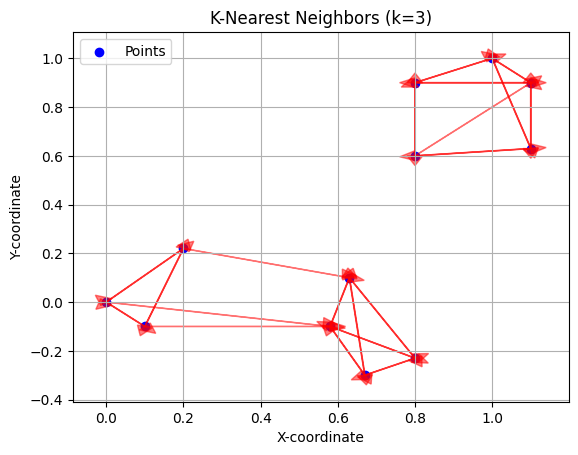

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def find_k_nearest_neighbors(points, k):
    # Calculate the pairwise Euclidean distances between points
    dist_matrix = np.linalg.norm(points[:, np.newaxis] - points, axis=2)

    # Set the diagonal elements (self-distances) to a large value to exclude them from neighbors
    np.fill_diagonal(dist_matrix, np.inf)

    # Find the indices of the k-nearest neighbors for each point
    k_nearest_indices = np.argpartition(dist_matrix, k, axis=1)[:, :k]

    return k_nearest_indices

# Define the set of points P and the value of k
P = np.array([[0, 0], [0.2, 0.22], [0.1, -0.1],
              [1, 1], [1.1, 0.9], [0.8, 0.9], [1.1, 0.63],
              [0.58, -0.1], [0.63, 0.1], [0.67, -0.3], [0.8, -0.23],
              [0.8, 0.6]])
k = 3

# Find the k-nearest neighbors for each point
k_nearest_indices = find_k_nearest_neighbors(P, k)

# Plot the points and arrows to their k-nearest neighbors
plt.scatter(P[:, 0], P[:, 1], c='b', marker='o', label='Points')
for i, point in enumerate(P):
    for neighbor_idx in k_nearest_indices[i]:
        neighbor = P[neighbor_idx]
        plt.arrow(point[0], point[1], neighbor[0] - point[0], neighbor[1] - point[1], head_width=0.04, head_length=0.04, fc='r', ec='r', alpha=0.5)

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title(f'K-Nearest Neighbors (k={k})')
plt.legend()
plt.grid(True)
plt.show()


# Write a function that fnds, given a fnite set of points in the plane and an integer k, the k nearest neighbors of each point in the set using numpy’s vectorized facilities.

In [2]:
import numpy as np

def k_nearest_neighbors(points, k):
    # Calculate the pairwise Euclidean distances between all points
    pairwise_distances = np.sqrt(np.sum((points[:, np.newaxis] - points) ** 2, axis=2))

    # Exclude self-distances (diagonal elements) by setting them to infinity
    np.fill_diagonal(pairwise_distances, np.inf)

    # Find the indices of the k smallest distances for each point
    k_indices = np.argsort(pairwise_distances, axis=1)[:, :k]

    # Get the k nearest neighbors for each point
    k_neighbors = points[k_indices]

    return k_neighbors

# Example usage:
if __name__ == "__main__":
    # Create a random set of 5 points in the plane
    points = np.random.rand(5, 2)

    # Set the number of nearest neighbors to find (k)
    k = 2

    # Find the k nearest neighbors for each point
    nearest_neighbors = k_nearest_neighbors(points, k)

    # Print the result
    for i, neighbors in enumerate(nearest_neighbors):
        print(f"Point {i} has {k} nearest neighbors: {neighbors}")



Point 0 has 2 nearest neighbors: [[0.2969624  0.18804436]
 [0.09717145 0.14980285]]
Point 1 has 2 nearest neighbors: [[0.32592894 0.17200897]
 [0.2969624  0.18804436]]
Point 2 has 2 nearest neighbors: [[0.4677187  0.46210824]
 [0.2969624  0.18804436]]
Point 3 has 2 nearest neighbors: [[0.32592894 0.17200897]
 [0.09717145 0.14980285]]
Point 4 has 2 nearest neighbors: [[0.2969624  0.18804436]
 [0.32592894 0.17200897]]


# Apply your function to this set of points with k = 3. Plot an arrow from each point to its k-nearest neighbors.

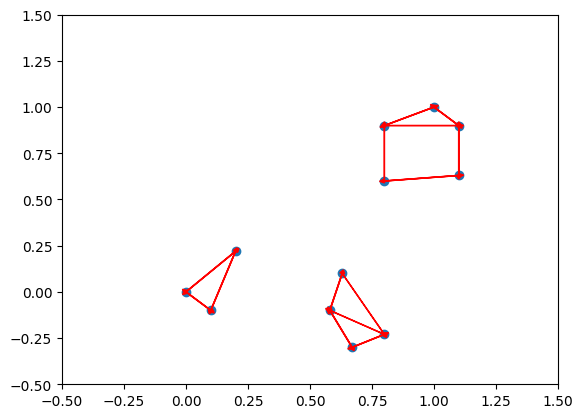

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Define the set of points and the value of k
P = np.array([[0,0], [0.2, 0.22], [0.1, -0.1],
             [1,1], [1.1, 0.9], [0.8, 0.9], [1.1, 0.63],
             [0.58, -0.1], [0.63, 0.1], [0.67, -0.3], [0.8,-0.23],
             [0.8, 0.6]])
k = 3

# Create a NearestNeighbors model
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(P)

# Find the k-nearest neighbors for each point
distances, indices = nbrs.kneighbors(P)

# Plot the points
plt.scatter(P[:,0], P[:,1])

# Plot arrows from each point to its k-nearest neighbors
for i in range(len(P)):
    for j in indices[i]:
        if i != j:
            plt.arrow(P[i, 0], P[i, 1], P[j, 0] - P[i, 0], P[j, 1] - P[i, 1], head_width=0.02, head_length=0.02, fc='red', ec='red')

# Set axis limits and show the plot
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()
